In [34]:
import sqlite3 as sql
import pandas as pd
import pickle
import copy
import math
import numpy as np
import seaborn as sns

In [3]:
with open('conversationframe.pkl','rb') as input:
    conversationframe = pickle.load(input)

In [37]:
klmreplies = []

for index,i in test.iterrows():
    conv = i['conv']
    lst1 = (conv['user_id'] == 56377143).to_list()
    lst2 = (conv['in_reply_to_status_id'].apply(lambda x: not math.isnan(x)).to_list())
    length = conv.shape[0]>2
    if np.mean([a and b for a, b in zip(lst1, lst2)]) > 0 and length:
        klmreplies.append(True)
    else:
        klmreplies.append(False)
        

In [64]:
def getLists(userid,frame):
    responsetimelist = []
    deltalist = []
    klmreplies = []

    for index,i in frame.iterrows():
        conv = i['conv']
        lst1 = (conv['user_id'] == userid).to_list()
        lst2 = (conv['in_reply_to_status_id'].apply(lambda x: not math.isnan(x)).to_list())
        length = conv.shape[0]>2
        if np.mean([a and b for a, b in zip(lst1, lst2)]) > 0 and length:
            klmreplies.append(True)
        else:
            klmreplies.append(False)
            
    for i in frame[klmreplies]['conv']:
        klmindex = (i['user_id'] == userid).to_list().index(True)
        try:
            deltatime = (i.iloc[klmindex]['created_at'] - i.iloc[klmindex-1]['created_at']).seconds/60
            deltasent = i.iloc[klmindex+1]['sentiment'] - i.iloc[klmindex-1]['sentiment']
            responsetimelist.append(deltatime)
            deltalist.append(deltasent)
        except:
            pass
    return responsetimelist,deltalist

In [67]:
responsetimelist,deltalist = getLists(56377143,conversationframe)

In [51]:
df_response = pd.DataFrame()
df_response['time'] = responsetimelist
df_response['delta'] = deltalist
df_response['time'] = df_response['time'].apply(lambda x: int(round(x,0)))
df_response = df_response.groupby('time').agg('mean')

Text(0.5, 1.0, 'Change in sentiment with respect to response time')

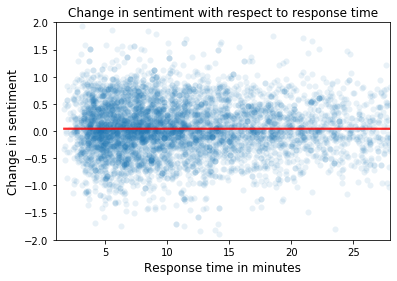

In [83]:
ax = sns.regplot(x=responsetimelist,y=deltalist,scatter_kws={'alpha':0.1,'linewidth' : 0},line_kws={'color': 'red','alpha':0.8})
ax.set_xlim(1,28)
ax.set_ylim(-2,2);
ax.set_ylabel('Change in sentiment',fontsize=12)
ax.set_xlabel('Response time in minutes',fontsize=12)
ax.set_title('Change in sentiment with respect to response time')